In [4]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anurag\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [5]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter

# Download required nltk resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Dictionary for slang lookup
slang_dict = {
    "u": "you","idc": "i don't care","ur": "your","r": "are","y": "why","idk": "i do not know","btw": "by the way","lol": "laugh out loud","thx": "thanks","ty": "thank you","omg": "oh my god","lmao": "laughing my ass off","brb": "be right back","ttyl": "talk to you later","imo": "in my opinion","fyi": "for your information",
}

def clean_text(text):
    if not isinstance(text, str):
        return ""

    # Convert to lowercase
    text = text.lower()

    # Remove unwanted non-ASCII characters-removed Ã°Ã¿Å“Ã°Ã¿Å¡
    text = text.encode("ascii", "ignore").decode()

    # Remove URLs
    text = re.sub(r"http[s]?://\S+", "", text)

    # Remove mentions (@username) and hashtags
    text = re.sub(r"@\w+|#\w+", "", text)

    # Remove punctuation and special characters except spaces
    text = re.sub(r"[^\w\s]", "", text)

    # Replace slang words
    words = text.split()
    words = [slang_dict[word] if word in slang_dict else word for word in words]

    # Remove extra spaces
    cleaned_text = " ".join(words).strip()

    return cleaned_text

def preprocess_text(text):
    if not text:
        return []

    # Tokenize text
    tokens = [word.lower() for word in word_tokenize(text)]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

    return lemmatized_tokens

def calculate_word_probabilities(tokens):
    if not tokens:
        print("No tokens to process.")
        return {}, {}

    total_words = len(tokens)
    word_counts = Counter(tokens)
    word_probabilities = {word: count / total_words for word, count in word_counts.items()}

    print("\n--- Word Frequencies and Probabilities ---\n")
    print("Top 10 Word Counts:", word_counts.most_common(10))
    
    print("\nTop 10 Word Probabilities:")
    for word, prob in list(word_probabilities.items())[:10]:
        print(f"{word}: {prob:.4f}")

    return word_counts, word_probabilities

def main():
    csv_file = 'final_tweets.csv'

    try:
        # Read CSV
        df = pd.read_csv(csv_file, encoding='utf-8', on_bad_lines='skip')

        # Ensure we only keep the first two columns (year, tweet)
        df = df.iloc[:, :2]
        df.columns = ['year', 'Tweet']
        
        # Remove NaN values
        df.dropna(subset=['Tweet'], inplace=True)

        # Define required keywords
        required_keywords = {"climate", "global warming", "environment", "nature",
                             "pollution", "plastic", "green energy", "food waste",
                             "water waste", "greenhouse", "recycling", "air quality",
                             "eco-friendly", "emission", "renewable energy", "sustainable",
                             "zero waste", "carbon dioxide", "ecology", "smog",
                             "biodiversity", "oxygen", "plants", "animals", "water pollution"}

        # Keep only tweets containing at least one required keyword
        df = df[df['Tweet'].str.contains('|'.join(required_keywords), case=False, na=False)]

    except Exception as e:
        print(f"Error reading CSV file: {e}")
        return

    print("\n--- Loaded Filtered Dataset ---\n")
    print(df.head())

    # Clean the text
    df['cleaned_tweet'] = df['Tweet'].astype(str).apply(clean_text)

    # Keep only the required columns
    df = df[['year', 'cleaned_tweet']]

    # Saving cleaned data to a new CSV file
    df.to_csv('CLEANED_DATASET_TWEET.csv', index=False, encoding='utf-8')

    # Combining cleaned tweets for preprocessing
    combined_text = ' '.join(df['cleaned_tweet'].astype(str))

    # Preprocess the text
    tokens = preprocess_text(combined_text)

    # Calculate word counts and probabilities
    calculate_word_probabilities(tokens)


if __name__ == "__main__":
    main()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anurag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anurag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anurag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



--- Loaded Filtered Dataset ---

   year                                              Tweet
0  2015  Procreate Coloring Book 16 Blooming Chibi Natu...
1  2015  Bear bones vehicles would out sell the planed ...
2  2015  @TJAllisonGolf It sounds like you're picking u...
3  2015  🌍🚀 @wildgocoin blends adventure, crypto, and w...
4  2015  @s0meone_u_know That alone raises questions ab...

--- Word Frequencies and Probabilities ---

Top 10 Word Counts: [('climat', 1871), ('chang', 910), ('amp', 428), ('pollut', 348), ('natur', 343), ('energi', 320), ('sustain', 307), ('like', 304), ('peopl', 283), ('oxygen', 276)]

Top 10 Word Probabilities:
procreat: 0.0000
color: 0.0001
book: 0.0005
16: 0.0001
bloom: 0.0000
chibi: 0.0000
natur: 0.0058
digit: 0.0005
page: 0.0000
adhd: 0.0000


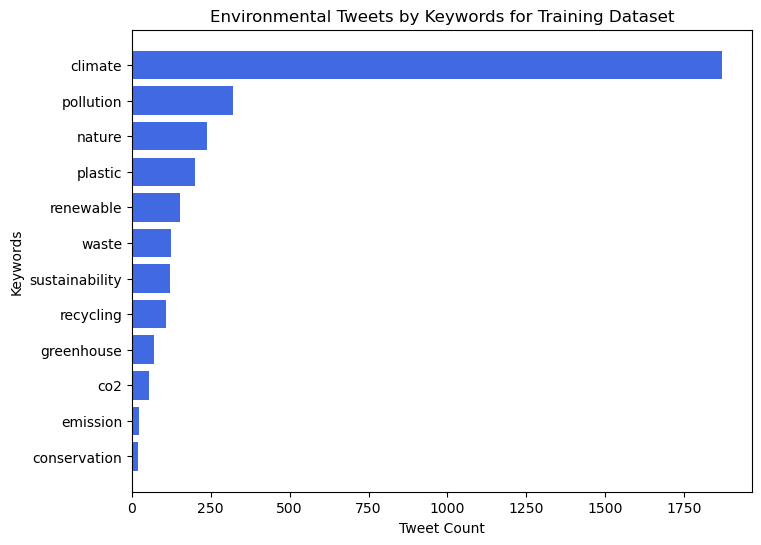

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter

# Load dataset
df = pd.read_csv("CLEANED_DATASET_TWEET.csv")

# Ensure column names are lowercase and stripped of extra spaces
df.columns = df.columns.str.strip().str.lower()

# Define a list of common environmental keywords
environmental_keywords = ["climate", "pollution", "plastic", "recycling", "nature",
                          "emission", "co2", "greenhouse", "eco-friendly", "sustainability",
                          "air quality", "renewable", "global warming", "waste", "conservation"]

# Function to extract keywords from tweets
def extract_keywords(text):
    text = str(text).lower()  # Convert to lowercase
    words = re.findall(r'\b\w+\b', text)  # Extract words
    return [word for word in words if word in environmental_keywords]  # Keep only relevant keywords

# Apply keyword extraction
df["extracted_keywords"] = df["cleaned_tweet"].apply(extract_keywords)

# Flatten the list and count occurrences
all_keywords = [word for keywords in df["extracted_keywords"] for word in keywords]
keyword_counts = Counter(all_keywords)

# Convert to DataFrame for plotting
keyword_df = pd.DataFrame(keyword_counts.items(), columns=["Keyword", "Count"]).sort_values(by="Count", ascending=True)

# Plot Horizontal Bar Chart
plt.figure(figsize=(8, 6))
plt.barh(keyword_df["Keyword"], keyword_df["Count"], color="royalblue")
plt.xlabel("Tweet Count")
plt.ylabel("Keywords")
plt.title("Environmental Tweets by Keywords for Training Dataset")

# Show the graph
plt.show()

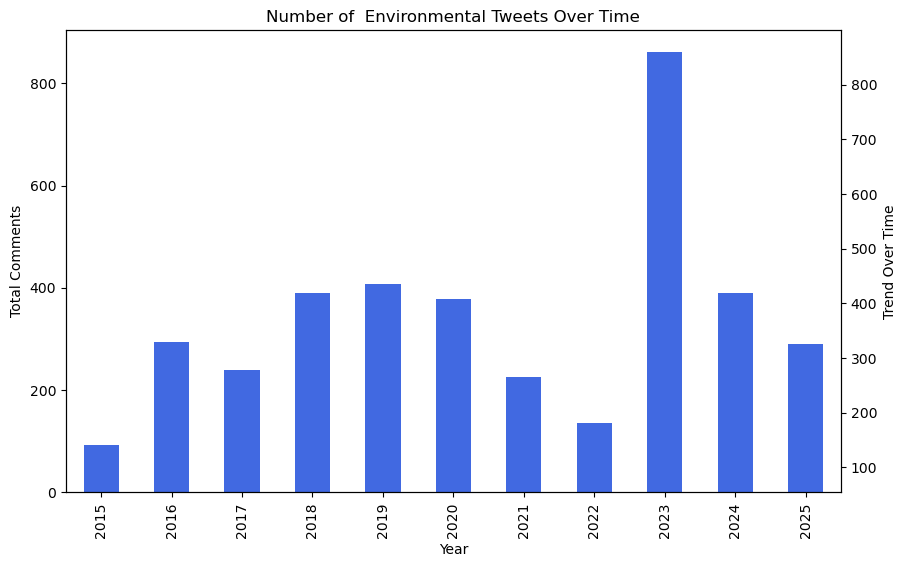

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("CLEANED_DATASET_TWEET.csv")  # Ensure the file exists in your working directory

# Ensure column names are lowercase and stripped of extra spaces
df.columns = df.columns.str.strip().str.lower()

# Check if 'year' column exists
if 'year' in df.columns:
    # Count tweets per year
    tweets_per_year = df['year'].value_counts().sort_index()

    # Plot Bar Graph
    fig, ax1 = plt.subplots(figsize=(10, 6))
    tweets_per_year.plot(kind='bar', ax=ax1, color='royalblue', label="Total Comments")

    # Overlay Line Plot
    ax2 = ax1.twinx()
    tweets_per_year.plot(kind='line', ax=ax2, color='black', marker='o', linestyle='-', label="Trend Line")

    # Labels and Title
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Total Comments")
    ax2.set_ylabel("Trend Over Time")
    ax1.set_title("Number of  Environmental Tweets Over Time")

    # Show the graph
    plt.show()
else:
    print("Column 'year' not found in dataset!")

In [7]:
import pandas as pd

# Load dataset
file_path = "CLEANED_DATASET_TWEET.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# Define extended list of environmental keywords to track
keywords = [
    "climate", "biodiversity", "emission", "carbon footprint", "eco-friendly", 
    "global warming", "pollution", "recycling", "plastic", "nature", "renewable energy", 
    "ecology", "green energy", "food waste", "co2", "smog", "sustainable", "air quality"
]

# Create a dictionary to store keyword counts per year
keyword_counts = {key: [] for key in keywords}
years = sorted(df["year"].unique())  # Extract available years

# Count occurrences of each keyword per year
for year in years:
    yearly_comments = df[df["year"] == year]["cleaned_tweet"].astype(str)
    for keyword in keywords:
        keyword_counts[keyword].append(yearly_comments.str.contains(keyword, case=False).sum())

# Convert to DataFrame
keyword_df = pd.DataFrame(keyword_counts, index=years)

# Identify the most popular keyword per year
popular_keywords_per_year = keyword_df.idxmax(axis=1)  # Get keyword with max count per year
popular_counts_per_year = keyword_df.max(axis=1)  # Get max count per year

# Get total tweets per year
total_tweets_per_year = df.groupby("year").size()

# Calculate the percentage of popular keyword tweets
popular_percentage = (popular_counts_per_year / total_tweets_per_year * 100).round(2)

# Create the final table
final_table = pd.DataFrame({
    "Year": years,
    "Total Tweets": total_tweets_per_year.values,
    "Popular Keyword": popular_keywords_per_year.values,
    "Popular Keyword Tweets": popular_counts_per_year.values,
    "Popular Keyword %": popular_percentage.values
})

# Display the table
print(final_table.to_string(index=False))


 Year  Total Tweets  Popular Keyword  Popular Keyword Tweets  Popular Keyword %
 2015            93           nature                      67              72.04
 2016           294      sustainable                      81              27.55
 2017           240          plastic                     122              50.83
 2018           390 renewable energy                      75              19.23
 2019           407          climate                     263              64.62
 2020           378          climate                     197              52.12
 2021           226          climate                     142              62.83
 2022           135          climate                      60              44.44
 2023           861          climate                     643              74.68
 2024           389          climate                     239              61.44
 2025           290          climate                     130              44.83


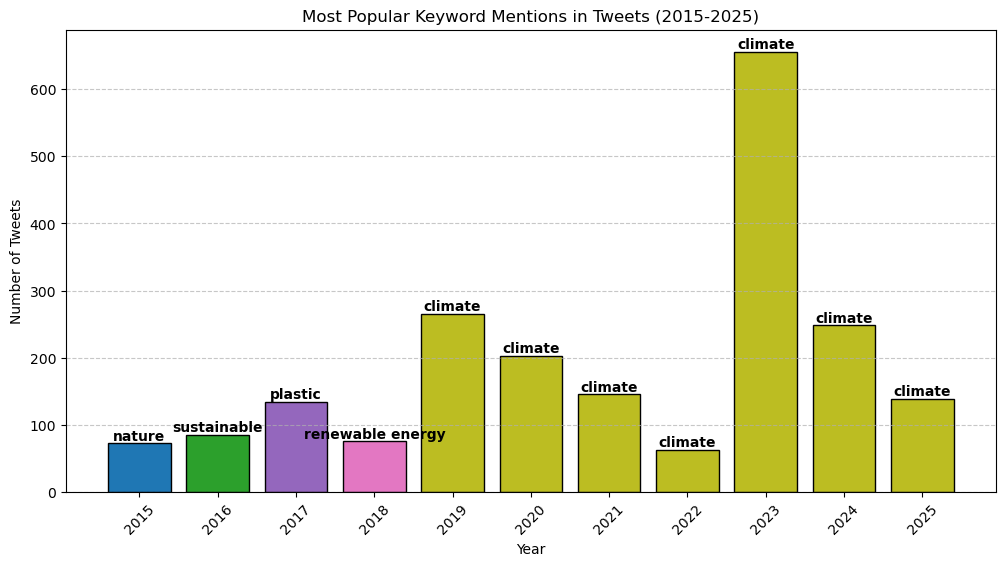

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for color scaling

# Load dataset
file_path = r"final_tweets.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# Define extended environmental keywords to track
keywords = [
    "climate", "biodiversity", "emission", "carbon footprint", "eco-friendly",
    "global warming", "pollution", "recycling", "plastic", "nature",
    "renewable energy", "ecology", "green energy", "food waste", "co2",
    "smog", "sustainable", "air quality"
]

# Create a dictionary to store keyword counts per year
keyword_counts = {key: [] for key in keywords}
years = sorted(df["Year"].unique())  # Extract available years dynamically

# Count occurrences of each keyword per year
for year in years:
    yearly_comments = df[df["Year"] == year]["Tweet"].astype(str)
    for keyword in keywords:
        keyword_counts[keyword].append(yearly_comments.str.contains(keyword, case=False).sum())

# Convert to DataFrame
keyword_df = pd.DataFrame(keyword_counts, index=years)

# Identify the most popular keyword per year
popular_keywords_per_year = keyword_df.idxmax(axis=1)  # Get keyword with max count per year
popular_counts_per_year = keyword_df.max(axis=1)  # Get max count per year

# Create a new DataFrame with only the most popular keywords
popular_df = pd.DataFrame({"Keyword": popular_keywords_per_year, "Count": popular_counts_per_year})

# Define colors for each keyword dynamically
unique_keywords = popular_df["Keyword"].unique()
color_palette = plt.get_cmap("tab20")  # Use plt.get_cmap correctly
keyword_colors = {keyword: color_palette(i / len(unique_keywords)) for i, keyword in enumerate(unique_keywords)}

# Assign colors based on the keyword
bar_colors = [keyword_colors[keyword] for keyword in popular_df["Keyword"]]

# Plot bar graph
plt.figure(figsize=(12, 6))
plt.bar(popular_df.index, popular_df["Count"], color=bar_colors, edgecolor="black")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Number of Tweets")
plt.title("Most Popular Keyword Mentions in Tweets (2015-2025)")
plt.xticks(years, rotation=45)

# Annotate bars with the keyword
for year, count, keyword in zip(popular_df.index, popular_df["Count"], popular_df["Keyword"]):
    plt.text(year, count + 5, keyword, ha="center", fontsize=10, fontweight="bold")

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [8]:
import pandas as pd
from tabulate import tabulate

# Load the dataset
file_path = r"finaldataset_with_sentiment.csv"
df = pd.read_csv(file_path)

# Group by 'year' and count total tweets
summary = df.groupby("year")["Sentiment"].value_counts().unstack().fillna(0)

# Rename columns for clarity
summary.columns = ["Negative", "Neutral", "Positive"]

# Calculate total tweets per year
summary["Popular"] = summary.sum(axis=1)

# Calculate percentages correctly
summary["Positive, %"] = (summary["Positive"] / summary["Popular"]) * 100
summary["Negative, %"] = (summary["Negative"] / summary["Popular"]) * 100
summary["Neutral, %"] = (summary["Neutral"] / summary["Popular"]) * 100

# Convert to integer values where needed
summary = summary.astype({"Positive": int, "Negative": int, "Neutral": int, "Popular": int})
summary = summary.round(2)  # Round percentages to 2 decimal places

# Reset index to move 'year' into columns
summary.reset_index(inplace=True)

# Add total row
total_row = pd.DataFrame({
    "year": ["Total"],
    "Popular": [summary["Popular"].sum()],
    "Positive": [summary["Positive"].sum()],
    "Negative": [summary["Negative"].sum()],
    "Neutral": [summary["Neutral"].sum()],
})

# Correct percentage calculations for the total row
total_row["Positive, %"] = (total_row["Positive"] / total_row["Popular"]) * 100
total_row["Negative, %"] = (total_row["Negative"] / total_row["Popular"]) * 100
total_row["Neutral, %"] = (total_row["Neutral"] / total_row["Popular"]) * 100

# Round percentages
total_row = total_row.round(2)

# Ensure columns match before concatenation
summary = pd.concat([summary, total_row], ignore_index=True)

# Ensure correct column ordering (Year should be the second column)
column_order = ["year", "Popular", "Positive", "Positive, %", "Negative", "Negative, %", "Neutral", "Neutral, %"]
summary = summary[column_order]

# Rename "year" to "Year"
summary.rename(columns={"year": "Year"}, inplace=True)

# Format table using tabulate for proper alignment
formatted_table = tabulate(summary, headers="keys", tablefmt="grid")

# Print the formatted table
print(formatted_table)

# Save to CSV
summary.to_csv("sentiment_summary.csv", index=False)
##


+----+--------+-----------+------------+---------------+------------+---------------+-----------+--------------+
|    | Year   |   Popular |   Positive |   Positive, % |   Negative |   Negative, % |   Neutral |   Neutral, % |
+====+========+===========+============+===============+============+===============+===========+==============+
|  0 | 2015   |        93 |         56 |         60.22 |         21 |         22.58 |        16 |        17.2  |
+----+--------+-----------+------------+---------------+------------+---------------+-----------+--------------+
|  1 | 2016   |       294 |        175 |         59.52 |         81 |         27.55 |        38 |        12.93 |
+----+--------+-----------+------------+---------------+------------+---------------+-----------+--------------+
|  2 | 2017   |       240 |         92 |         38.33 |         87 |         36.25 |        61 |        25.42 |
+----+--------+-----------+------------+---------------+------------+---------------+-----------

In [9]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the dataset
file_path = r"CLEANED_DATASET_TWEET.csv"  
df = pd.read_csv(file_path)

# Print column names to verify
print("Columns in dataset:", df.columns)

# Initialize Vader Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_vader(text):
    score = analyzer.polarity_scores(str(text))  
    # Convert to string to avoid errors
    if score['compound'] >= 0.05:
        return "Positive"
    elif score['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Check if 'cleaned_tweet' exists before applying sentiment analysis
if "cleaned_tweet" in df.columns:
    df["Sentiment"] = df["cleaned_tweet"].apply(get_sentiment_vader)
else:
    print("Error: 'cleaned_tweet' column not found in dataset.")

# Display first few rows
print(df.head())

# Save the modified dataset
df.to_csv("finaldataset_with_sentiment.csv", index=False)
##


Columns in dataset: Index(['year', 'cleaned_tweet'], dtype='object')
   year                                      cleaned_tweet Sentiment
0  2015  procreate coloring book 16 blooming chibi natu...  Positive
1  2015  bear bones vehicles would out sell the planed ...  Negative
2  2015  it sounds like youre picking up on the intense...  Positive
3  2015  blends adventure crypto and wildlife conservat...  Positive
4  2015  that alone raises questions about the nature o...  Negative


In [12]:
# Import necessary libraries
import pandas as pd
import math  # For PMI calculations
from collections import Counter

# Load the cleaned dataset
file_path = "CLEANED_DATASET_TWEET.csv"  # Update file path if needed
df = pd.read_csv(file_path, encoding="utf-8")  # Read CSV file

# Print column names to verify dataset structure
print("Columns in dataset:", df.columns)

# Define positive and negative reference words based on the base paper
positive_words = ["good", "great", "excellent", "positive", "happy", "eco-friendly", "renewable", "clean", "green", "sustainable"]
negative_words = ["bad", "terrible", "pollution", "emission", "dirty", "waste", "hazardous", "climate crisis", "global warming", "deforestation"]

# Ensure the required column exists
if "cleaned_tweet" not in df.columns:
    print("Error: 'cleaned_tweet' column not found in dataset.")
    exit()

# Tokenize text by splitting on spaces (assuming the text is already cleaned)
df["tokens"] = df["cleaned_tweet"].astype(str).apply(lambda x: x.split())

# Flatten list of words to count word frequencies
all_tokens = [word for tokens in df["tokens"] for word in tokens]

# Calculate word frequencies
word_freq = Counter(all_tokens)
total_words = sum(word_freq.values())  # Total words in dataset

# Calculate PMI for a word
def calculate_pmi(word, positive=True):
    word_prob = word_freq[word] / total_words if word in word_freq else 1e-6  # Probability of the word
    ref_words = positive_words if positive else negative_words
    pmi_score = sum(math.log((word_freq[word] / total_words) / (word_freq[w] / total_words + 1e-6), 2) 
                     for w in ref_words if w in word_freq)
    return pmi_score / len(ref_words)  # Average PMI score

# Function to get sentiment based on PMI
def get_sentiment_pmi(tokens):
    if not tokens:
        return "Neutral"
    positive_score = sum(calculate_pmi(word, positive=True) for word in tokens)
    negative_score = sum(calculate_pmi(word, positive=False) for word in tokens)
    sentiment_score = positive_score - negative_score
    if sentiment_score > 0.1:
        return "Positive"
    elif sentiment_score < -0.1:
        return "Negative"
    else:
        return "Neutral"

# Apply PMI sentiment analysis
df["Sentiment"] = df["tokens"].apply(get_sentiment_pmi)

# Display first few rows
print(df.head())

# Save the modified dataset with sentiment labels
df.to_csv("finaldataset_with_pmi_sentiment.csv", index=False)


Columns in dataset: Index(['year', 'cleaned_tweet'], dtype='object')
   year                                      cleaned_tweet  \
0  2015  procreate coloring book 16 blooming chibi natu...   
1  2015  bear bones vehicles would out sell the planed ...   
2  2015  it sounds like youre picking up on the intense...   
3  2015  blends adventure crypto and wildlife conservat...   
4  2015  that alone raises questions about the nature o...   

                                              tokens Sentiment  
0  [procreate, coloring, book, 16, blooming, chib...  Negative  
1  [bear, bones, vehicles, would, out, sell, the,...  Negative  
2  [it, sounds, like, youre, picking, up, on, the...  Negative  
3  [blends, adventure, crypto, and, wildlife, con...  Negative  
4  [that, alone, raises, questions, about, the, n...  Negative  


In [13]:
#importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [14]:
#loading the dataset
file_path = "CLEANED_DATASET_TWEET.csv"  
df = pd.read_csv(file_path)

In [15]:
# Function to classify sentiment
def get_sentiment(text):
    #polarity =(uses) pre-definedsentiment lexicon to generate numerrical value
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

In [16]:
# Apply sentiment analysis
df["sentiment"] = df["cleaned_tweet"].apply(get_sentiment)

In [17]:
# Aggregate sentiment counts by year
sentiment_counts = df.groupby(["year", "sentiment"]).size().unstack(fill_value=0)

In [18]:
# Define custom colors for sentiment categories
custom_colors = {"negative": "red", "neutral": "grey", "positive": "green"}

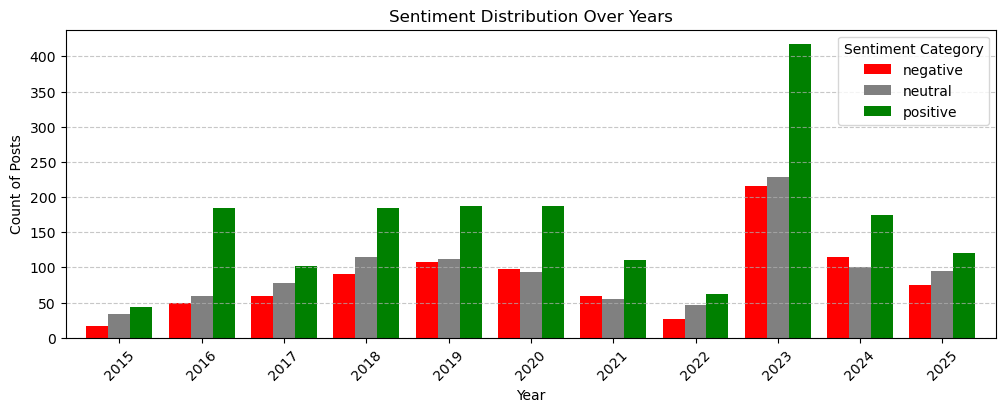

In [19]:
# Plot the sentiment distribution
#ax = axis object
ax = sentiment_counts.plot(kind="bar", figsize=(12, 4), width=0.8, color=[custom_colors[col] for col in sentiment_counts.columns])

plt.xlabel("Year")
plt.ylabel("Count of Posts")
plt.title("Sentiment Distribution Over Years")
plt.legend(title="Sentiment Category")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [20]:
# Convert 'year' column to integer
df["year"] = df["year"].astype(int)

In [21]:
def search_keyword_trend():
    keyword = input("Enter the keyword to search for: ")  # Getting input from user
    
    # Filtering tweets containing the keyword
    filtered_df = df[df["cleaned_tweet"].str.contains(keyword, case=False, na=False)]
    
    # Counts the tweets per year and sentiment
    sentiment_counts = filtered_df.groupby(["year", "sentiment"]).size().unstack(fill_value=0)

    # Ensure all years data are present
    years = list(range(2015, 2026))
    for sentiment in ["negative", "neutral", "positive"]:
        if sentiment not in sentiment_counts.columns:
            sentiment_counts[sentiment] = 0
    sentiment_counts = sentiment_counts.reindex(years, fill_value=0)

    # Plot the line graph for each sentiment
    plt.figure(figsize=(10, 5))
    plt.plot(sentiment_counts.index, sentiment_counts["negative"], marker="o", linestyle="-", color="red", label="Negative")
    plt.plot(sentiment_counts.index, sentiment_counts["neutral"], marker="o", linestyle="-", color="grey", label="Neutral")
    plt.plot(sentiment_counts.index, sentiment_counts["positive"], marker="o", linestyle="-", color="green", label="Positive")

    plt.xlabel("Year")
    plt.ylabel("Number of Tweets")
    plt.title(f"Sentiment Trend for '{keyword}' (2015-2025)")
    plt.xticks(years, rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.legend()

    plt.show()

Enter the keyword to search for:  climate


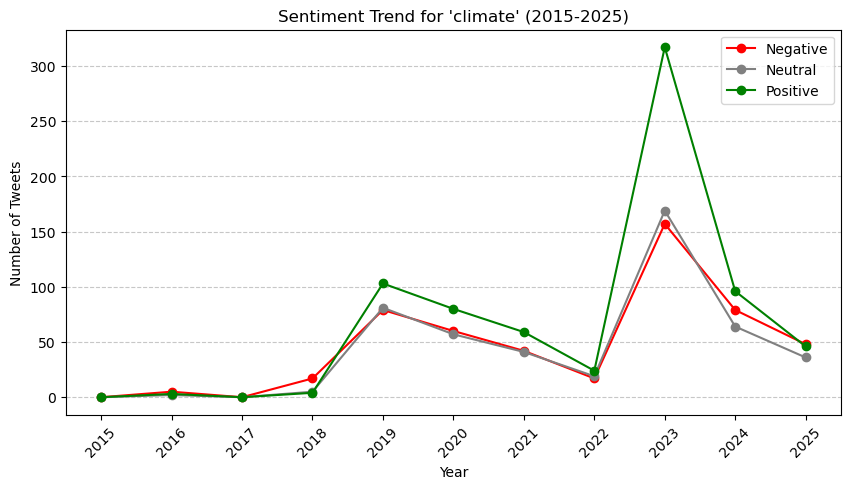

In [24]:
# user input
search_keyword_trend()

In [25]:
import pandas as pd
from textblob import TextBlob

# Loading the dataset (CSV file)
file_path = "TESTING_DATA_LABELED.csv" 
df = pd.read_csv(file_path) 

# Function to determine sentiment using TextBlob
def get_sentiment_textblob(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Applying sentiment analysis to the 'cleaned_tweet' column
df["predicted_sentiment"] = df["cleaned_tweet"].apply(get_sentiment_textblob)

# Save the updated dataset as CSV
output_file = "TESTING_DATA_PREDICTED.csv"  # Output saved in a new CSV file
df.to_csv(output_file, index=False)

print(f"File saved as '{output_file}'.")


File saved as 'TESTING_DATA_PREDICTED.csv'.


In [26]:
import pandas as pd

# Load the dataset with actual and predicted sentiments
file_path = "TESTING_DATA_PREDICTED.csv"  # Change to your actual file path
df = pd.read_csv(file_path)

# Count TP, TN, FP, FN

TP = ((df["actual_sentiment"] == "Positive") & (df["predicted_sentiment"] == "Positive")).sum()
TN = ((df["actual_sentiment"] == "Negative") & (df["predicted_sentiment"] == "Negative")).sum()
FP = ((df["actual_sentiment"] != "Positive") & (df["predicted_sentiment"] == "Positive")).sum()
FN = ((df["actual_sentiment"] != "Negative") & (df["predicted_sentiment"] == "Negative")).sum()

# Calculate measures
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print Results
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1_score:.2%}")


True Positives (TP): 14
True Negatives (TN): 8
False Positives (FP): 8
False Negatives (FN): 0
Accuracy: 73.33%
Precision: 63.64%
Recall: 100.00%
F1-Score: 77.78%


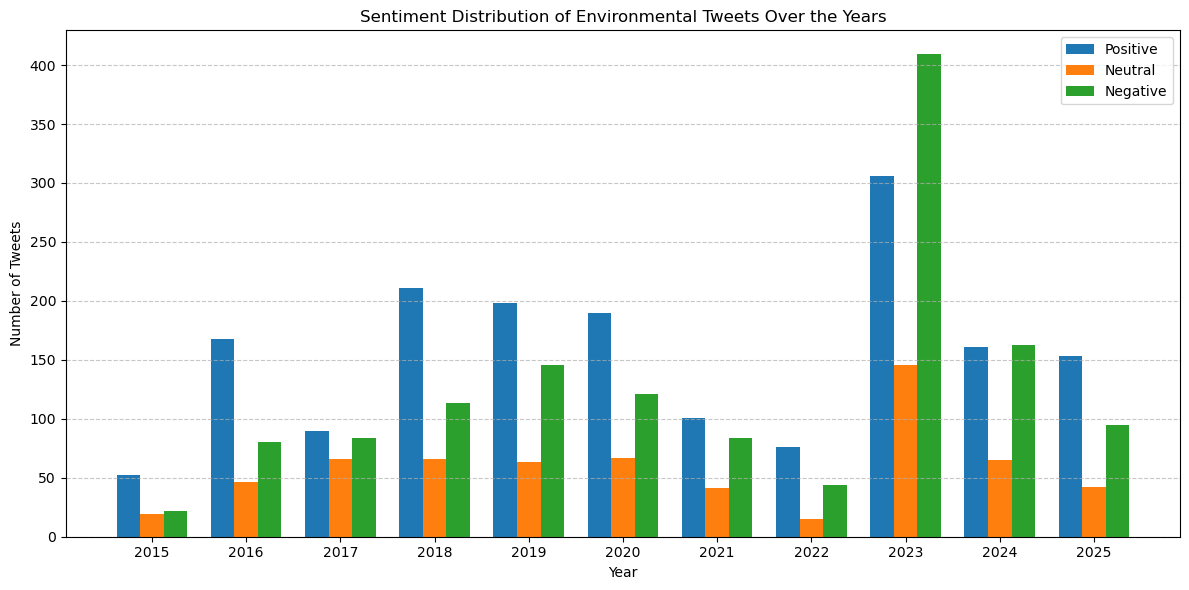

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("data.xls")

# Group by year and sentiment label
grouped = df.groupby(['year', 'sentiment_label']).size().reset_index(name='count')

# Pivot the table to get each sentiment as a separate column
pivoted = grouped.pivot(index='year', columns='sentiment_label', values='count').fillna(0)

# Sort by year
pivoted = pivoted.sort_index()

# Set up bar positions
years = pivoted.index.astype(int)
bar_width = 0.25
x = np.arange(len(years))

# Sentiment data
positive = pivoted.get('Positive', pd.Series([0]*len(x)))
neutral = pivoted.get('Neutral', pd.Series([0]*len(x)))
negative = pivoted.get('Negative', pd.Series([0]*len(x)))

# Plot grouped bars
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, positive, width=bar_width, label='Positive')
plt.bar(x, neutral, width=bar_width, label='Neutral')
plt.bar(x + bar_width, negative, width=bar_width, label='Negative')

# Labels and formatting
plt.xlabel("Year")
plt.ylabel("Number of Tweets")
plt.title("Sentiment Distribution of Environmental Tweets Over the Years")
plt.xticks(ticks=x, labels=years)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anurag\AppData\Roaming\nltk_data...


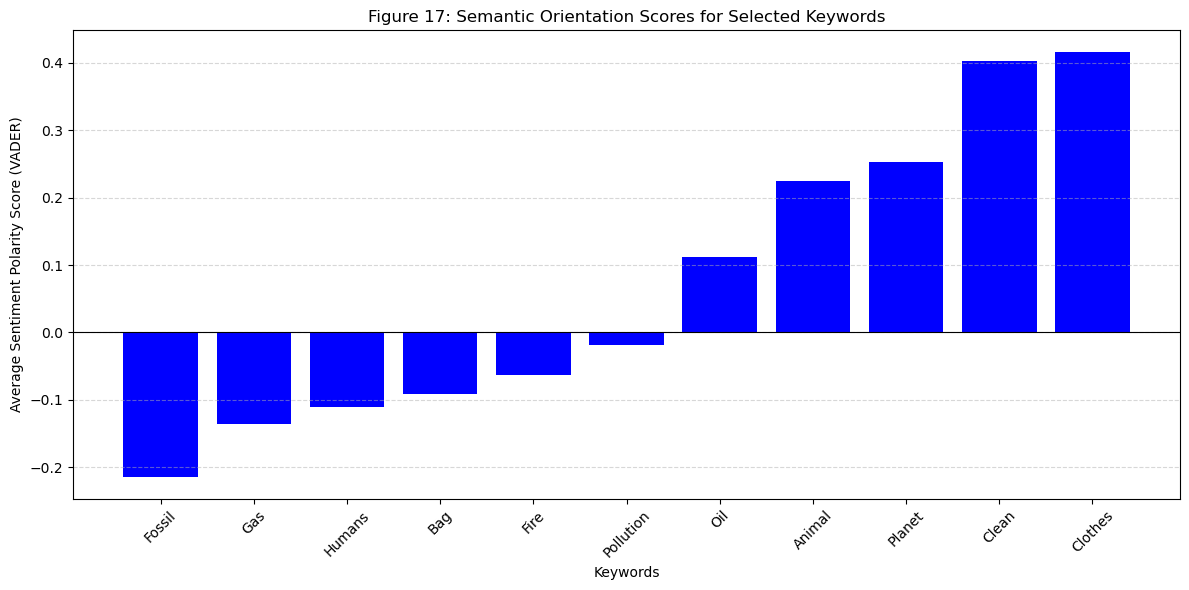

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import defaultdict
import numpy as np

# Download VADER lexicon
nltk.download('vader_lexicon')

# Load data
df = pd.read_csv("data.xls")
df['text'] = df['text'].str.lower()

# Keywords as in the base paper (Figure 17)
keywords = ['fire', 'animal', 'humans', 'oil', 'clothes', 'fossil', 'pollution', 'bag', 'gas', 'clean', 'planet']

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Collect sentiment scores per keyword
keyword_scores = defaultdict(list)
for _, row in df.iterrows():
    text = row['text']
    score = sia.polarity_scores(text)['compound']
    for word in keywords:
        if word in text:
            keyword_scores[word].append(score)

# Calculate average sentiment
avg_scores = {k: np.mean(v) if v else 0 for k, v in keyword_scores.items()}

# Sort for nice display
sorted_keywords = sorted(avg_scores.items(), key=lambda x: x[1])
labels = [k.capitalize() for k, _ in sorted_keywords]
scores = [v for _, v in sorted_keywords]
colors = ['blue' if s > 0 else 'blue' for s in scores]

# Plot vertical bar chart
plt.figure(figsize=(12, 6))
plt.bar(labels, scores, color=colors)
plt.axhline(0, color='black', linewidth=0.8)
plt.title("Figure 17: Semantic Orientation Scores for Selected Keywords")
plt.ylabel("Average Sentiment Polarity Score (VADER)")
plt.xlabel("Keywords")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anurag\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


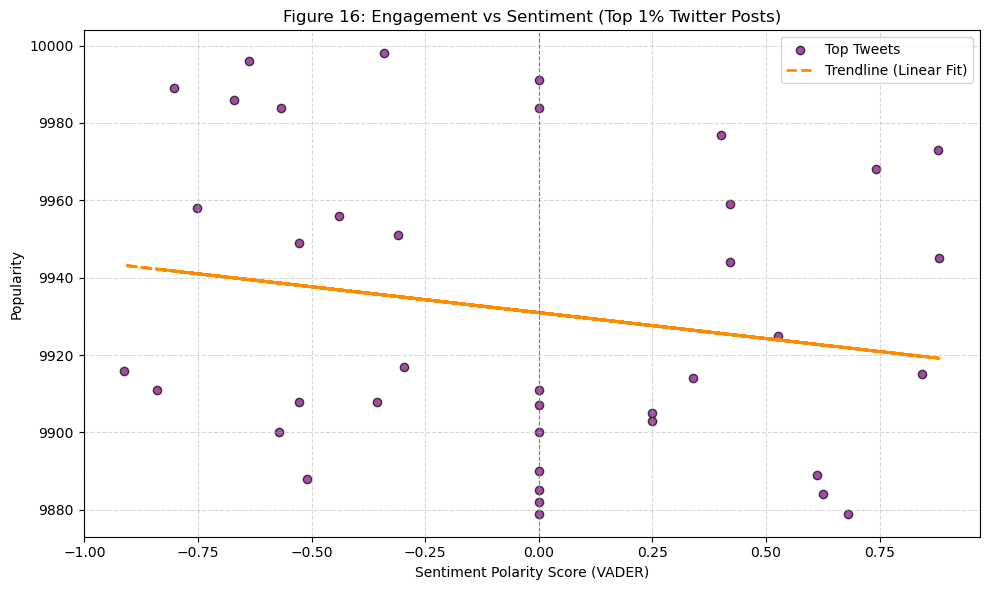

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

# Download VADER lexicon
nltk.download('vader_lexicon')

# Load dataset
df = pd.read_csv("data.xls")

# Filter Twitter
twitter_df = df[df['platform'].str.lower() == 'twitter'].copy()

# Simulate likes if missing
if 'likes' not in twitter_df.columns:
    np.random.seed(42)
    twitter_df['likes'] = np.random.randint(0, 10000, size=len(twitter_df))

# Sentiment score using VADER
sia = SentimentIntensityAnalyzer()
twitter_df['sentiment_score'] = twitter_df['text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Top 1% most liked tweets
threshold = twitter_df['likes'].quantile(0.99)
top_1_percent = twitter_df[twitter_df['likes'] >= threshold]

#  Prepare data for trendline
x = top_1_percent['sentiment_score']
y = top_1_percent['likes']
z = np.polyfit(x, y, 1)  # Linear regression
p = np.poly1d(z)

# Plot with trendline
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, color='purple', edgecolors='black', label='Top Tweets')
plt.plot(x, p(x), color='darkorange', linestyle='--', linewidth=2, label='Trendline (Linear Fit)')
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Figure 16: Engagement vs Sentiment (Top 1% Twitter Posts)")
plt.xlabel("Sentiment Polarity Score (VADER)")
plt.ylabel("Popularity")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


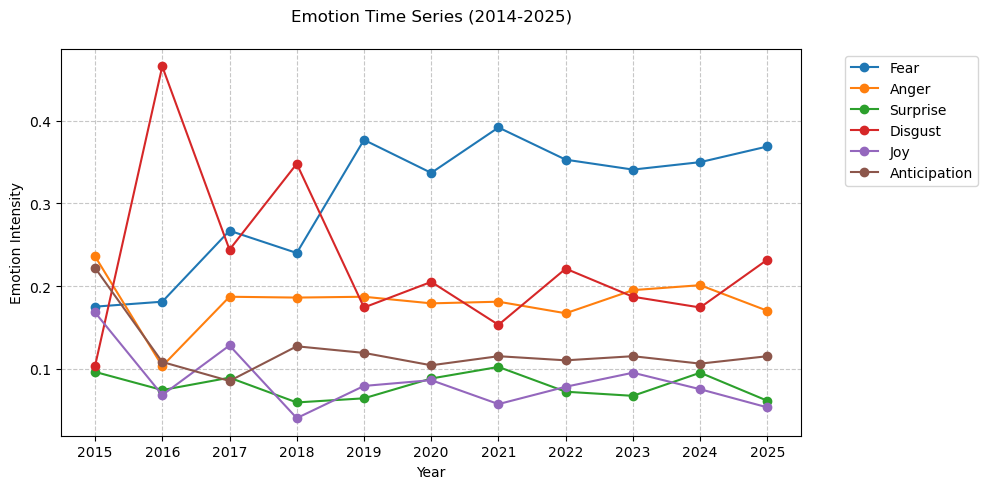

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from nrclex import NRCLex
from collections import defaultdict
import numpy as np

# Load data
df = pd.read_csv('data.xls')

# Filter for Twitter + Negative tweets (as in your original code)
df = df[(df['platform'] == 'Twitter') & (df['sentiment_label'] == 'Negative')]

# Use the emotions shown in your image
tracked_emotions = ['fear', 'anger', 'surprise', 'disgust', 'joy', 'anticipation']

# Store raw intensity per emotion per year
emotion_yearly_scores = defaultdict(lambda: defaultdict(list))

# Compute emotion intensity from NRCLex
for _, row in df.iterrows():
    year = row['year']
    text = row['text']
    emo_obj = NRCLex(text)
    scores = emo_obj.raw_emotion_scores
    
    # Calculate total intensity for normalization
    total = sum(scores.get(e, 0) for e in tracked_emotions)
    if total == 0:
        continue
        
    for emo in tracked_emotions:
        intensity = scores.get(emo, 0) / total
        emotion_yearly_scores[emo][year].append(intensity)

# Compute mean intensity per year for each emotion
emotion_mean_per_year = {emo: {} for emo in tracked_emotions}
years = sorted(df['year'].unique())

for emo in tracked_emotions:
    for year in years:
        values = emotion_yearly_scores[emo].get(year, [])
        if values:
            emotion_mean_per_year[emo][year] = np.mean(values)

# Create a DataFrame for the results (similar to your image)
result_df = pd.DataFrame(index=years)
for emo in tracked_emotions:
    result_df[emo] = result_df.index.map(lambda y: emotion_mean_per_year[emo].get(y, np.nan))

# Fill missing values with the mean of adjacent years
result_df = result_df.interpolate(limit_direction='both')

# Round to 3 decimal places like in your image
result_df = result_df.round(3)

# Plotting (simplified like your image)
plt.figure(figsize=(10, 5))
for emo in tracked_emotions:
    plt.plot(result_df.index, result_df[emo], marker='o', label=emo.capitalize())

plt.title("Emotion Time Series (2014-2025)", pad=20)
plt.xlabel("Year")
plt.ylabel("Emotion Intensity")
plt.xticks(result_df.index)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()